# Boosting Algorithms

## Introduction

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/

https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

https://analyticsindiamag.com/xgboost-internal-working-to-make-decision-trees-and-deduce-predictions/

https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

**Boosting** is one of the most powerful ensemble modelling techniques for building predictive models. The idea of boosting came out of the idea of whether a weak learner can be modified to become better. Hypothesis boosting was the idea of filtering observations, leaving those observations that the weak learner can handle and focusing on developing new weak learns to handle the remaining difficult observations. **Boosting algorithms** improve the prediction power by converting a number of weak learners to strong learners. 
The principle behind boosting algorithms is first we built a model on the training dataset, then a second model is built to rectify the errors present in the first model. This procedure is continued until and unless the errors are minimized, and the dataset is predicted correctly. These are the machine learning algorithms that follow the process of training for predicting and fine-tuning the result.

To convert weak learner to strong learner, combine the prediction of the weak learner using the following methods.

- Using average or weighted average.
- Consider prediction has a higher vote.

**How Boosting Algorithms Works?**

Boosting Algorithms combines each weak learner to create one strong prediction rule. To identify the weak rule, there is a base Learning algorithm (Machine Learning). Whenever the Base algorithm is applied, it creates new prediction rules using the iteration process. After some iteration, it combines all weak rules to create one single prediction rule.
To choose the right distribution follows the below-mentioned steps:
- **Step 1:** The base Learning algorithm combines each distribution and applies equal weight to each distribution.
- **Step 2:** If any prediction occurs during the first base learning algorithm, then we pay high attention to that prediction error.
- **Step 3:** Repeat step 2 until the limit of the Base Learning algorithm has been reached or high accuracy.
- **Step 4:** Finally, it combines all the weak learner to create one strong prediction tule.

There are several types of Boosting Algorithms:
- AdaBoost (Adaptive Boosting) algorithm
- Gradient Boosting algorithm
- XG Boost algorithm
- Light GBM
- CatBoost

The first realization of boosting that saw great success in application was **Adaptive Boosting or AdaBoost for short**.

## Content

1. <a href = "#1.-AdaBoost-Algorithm">AdaBoost Algorithm</a>
2. <a href = "#2.-Gradient-Boosting-Algorithm">Gradient Boosting Algorithm</a>
3. <a href = "#3.-Light-GBM">Light GBM</a>
4. <a href = "#4.-XGBoost">XGBoost</a>
5. <a href = "#5.-CatBoost">CatBoost</a>

### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

## 1. AdaBoost Algorithm

**AdaBoost** also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. These trees are also called **Decision Stumps**.

**What is AdaBoost Algorithm Used for?**

AdaBoost can be used for face detection as it seems to be the standard algorithm for face detection in images. It uses a rejection cascade consisting of many layers of classifiers. When the detection window is not recognized at any layer as a face, it is rejected. The first classifier in the window discards the negative window keeping the computational cost to a minimum. Though AdaBoost combines the weak classifiers, the principles of AdaBoost are also used to find the best features to use in each layer of the cascade.

**How does AdaBoost work?**

It builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.
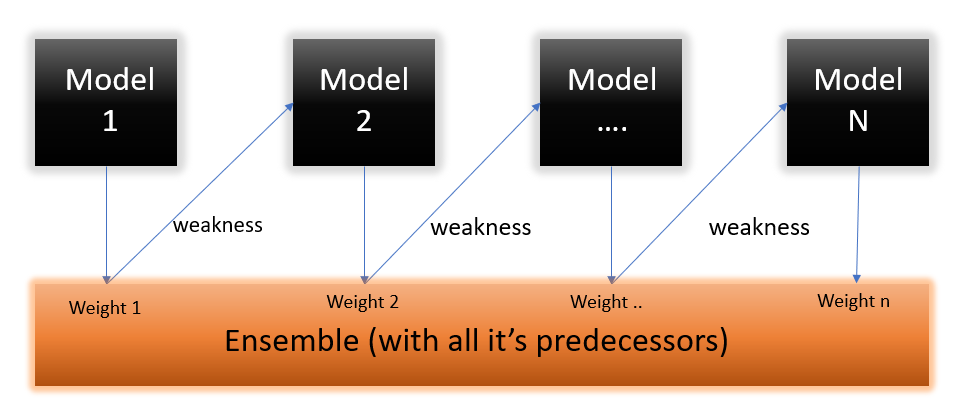

All the steps taken in AdaBoost are:
- Assign equal weights to all the datapoints.
- Find the stump that does the best job classifying the new collection of samples by finding their Gini Index and selecting the one with the lowest Gini index
- Calculate the “Amount of Say” and “Total error” to update the previous sample weights.
- Normalize the new sample weights.
- Iterate through these steps until and unless a low training error is achieved.
- Make a final model using the weighted average of individual models.

The **“Amount of Say”** or “Importance” or “Influence” for this classifier in classifying the datapoints using this formula:
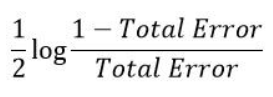

The **"Total Error"** is nothing, but the summation of all the sample weights of misclassified data points.

**Advantages and Disadvantages of AdaBoost:**

AdaBoost has a lot of advantages, mainly it is easier to use with less need for tweaking parameters unlike algorithms like SVM. As a bonus, you can also use AdaBoost with SVM. Theoretically, AdaBoost is not prone to overfitting though there is no concrete proof for this. It could be because of the reason that parameters are not jointly optimized — stage-wise estimation slows down the learning process. To understand the math behind it in depth, you can follow this link.

AdaBoost can be used to improve the accuracy of your weak classifiers hence making it flexible. It has now being extended beyond binary classification and has found use cases in text and image classification as well.

**A few Disadvantages of AdaBoost are :**

Boosting technique learns progressively, it is important to ensure that you have quality data. AdaBoost is also extremely sensitive to Noisy data and outliers so if you do plan to use AdaBoost then it is highly recommended to eliminate them.

AdaBoost has also been proven to be slower than XGBoost.

In [2]:
#Reading Dataset from csv file
basepath = '../../Data\\'
df = pd.read_table(basepath+ 'fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
#Input and Output Variables
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']
y.unique() #Multiclass

array([1, 2, 3, 4], dtype=int64)

In [4]:
#Scaling X and y
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

#Splitting dataset into Train Test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41,) (18,)


In [5]:
#AdaBoost Algorithm 
adab = AdaBoostClassifier()
adab.fit(X_train, y_train)

#Predicting
y_pred = adab.predict(X_test)
y_pred

array([3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 2, 1], dtype=int64)

In [6]:
#Accuracy of Prediction
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

conf_df = confusion_matrix(test_calc['fruit_label'],test_calc['predicted'])
print (conf_df)

metric_report = classification_report(test_calc['fruit_label'], test_calc['predicted'])
print(metric_report)  

[[4 0 2 0]
 [0 1 0 0]
 [1 0 5 0]
 [4 0 1 0]]
              precision    recall  f1-score   support

           1       0.44      0.67      0.53         6
           2       1.00      1.00      1.00         1
           3       0.62      0.83      0.71         6
           4       0.00      0.00      0.00         5

    accuracy                           0.56        18
   macro avg       0.52      0.62      0.56        18
weighted avg       0.41      0.56      0.47        18



c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>While analyzing the predicted output, we see that the accuracy of the model is at 56%.

[<a href="#Content">Back to Content</a>]

## 2. Gradient Boosting Algorithm

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. The gradient boosting algorithm (gbm) can be most easily explained by first introducing the AdaBoost Algorithm.The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree.

Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). Gradient Boosting is an iterative functional gradient algorithm, i.e an algorithm which minimizes a loss function by iteratively choosing a function that points towards the negative gradient; a weak hypothesis.

Gradient boosting algorithm is one of the most powerful algorithms in the field of machine learning. As we know that the errors in machine learning algorithms are broadly classified into two categories i.e. Bias Error and Variance Error. As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.

Unlike, Adaboosting algorithm, the base estimator in the gradient boosting algorithm cannot be mentioned by us. The base estimator for the Gradient Boost algorithm is fixed and i.e. Decision Stump. Like, AdaBoost, we can tune the n_estimator of the gradient boosting algorithm. However, if we do not mention the value of n_estimator, the default value of n_estimator for this algorithm is 100.

**What is Gradient Boosting Algorithm used for?**

Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical target variable (as a Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is used as a classifier then the cost function is Log loss.

**Gradient Boosting has three main components:**

- **The loss function** is a measure indicating how good are model’s coefficients are at fitting the underlying data.The role of the loss function is to estimate how good the model is at making predictions with the given data. A logical understanding of loss function would depend on what we are trying to optimise.
- **Weak Learner** - A weak learner is one that classifies our data but does so poorly, perhaps no better than random guessing. In other words, it has a high error rate. These are typically decision trees (also called decision stumps, because they are less complicated than typical decision trees).
- **Additive Model** - This is the iterative and sequential approach of adding the trees (weak learners) one step at a time. After each iteration, we need to be closer to our final model. In other words, each iteration should reduce the value of our loss function.

**Advantages of Gradient Boosting are:**

- Often provides predictive accuracy that cannot be trumped.
- Lots of flexibility - can optimize on different loss functions and provides several hyper parameter tuning options that make the function fit very flexible.
- No data pre-processing required - often works great with categorical and numerical values as is.
- Handles missing data - imputation not required.

**Disadvantages of Gradient Boosting are:**

- Gradient Boosting Models will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.
- Computationally expensive - often require many trees (>1000) which can be time and memory exhaustive.
- The high flexibility results in many parameters that interact and influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.
- Less interpretative in nature, although this is easily addressed with various tools.

In [7]:
#Reading Dataset from csv file
basepath = '../../Data\\'
df = pd.read_table(basepath+ 'fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
#Input and Output Variables
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']
y.unique() #Multiclass

array([1, 2, 3, 4], dtype=int64)

In [9]:
#Scaling X and y
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

#Splitting dataset into Train Test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41,) (18,)


In [10]:
# define the model
model = GradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(X_train, y_train)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

c:\program files\python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\program files\python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\program files\python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Mean Accuracy: 0.904 (0.101)


>While analyzing the predicted output, we see that the accuracy of the model is at 91.1%.

In [11]:
# Predicting
yhat = model.predict(X_test)
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 3


[<a href="#Content">Back to Content</a>]

## 3. Light GBM

Light Gradient Boosted Machine, or LightGBM for short, is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

LightGBM extends the gradient boosting algorithm by adding a type of automatic feature selection as well as focusing on boosting examples with larger gradients. This can result in a dramatic speedup of training and improved predictive performance.

As such, LightGBM has become a de facto algorithm for machine learning competitions when working with tabular data for regression and classification predictive modeling tasks. As such, it owns a share of the blame for the increased popularity and wider adoption of gradient boosting methods in general, along with Extreme Gradient Boosting (XGBoost).

It uses two novel techniques: **Gradient-based One Side Sampling** and **Exclusive Feature Bundling (EFB)** which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks. The two techniques of GOSS and EFB described below form the characteristics of LightGBM Algorithm. They comprise together to make the model work efficiently and provide it a cutting edge over other GBDT frameworks

- **Gradient-based One Side Sampling Technique for LightGBM:**, or GOSS for short, is a modification to the gradient boosting method that focuses attention on those training examples that result in a larger gradient, in turn speeding up learning and reducing the computational complexity of the method. With GOSS, we exclude a significant proportion of data instances with small gradients, and only use the rest to estimate the information gain. We prove that, since the data instances with larger gradients play a more important role in the computation of information gain, GOSS can obtain quite accurate estimation of the information gain with a much smaller data size.

- **Exclusive Feature Bundling Technique for LightGBM:**, or EFB for short, is an approach for bundling sparse (mostly zero) mutually exclusive features, such as categorical variable inputs that have been one-hot encoded. As such, it is a type of automatic feature selection. High-dimensional data are usually very sparse which provides us a possibility of designing a nearly lossless approach to reduce the number of features. Specifically, in a sparse feature space, many features are mutually exclusive, i.e., they never take nonzero values simultaneously. The exclusive features can be safely bundled into a single feature (called an Exclusive Feature Bundle).  Hence, the complexity of histogram building changes from O(#data × #feature) to O(#data × #bundle), while #bundle<<#feature . Hence, the speed for training framework is improved without hurting accuracy.

Together, these two changes can accelerate the training time of the algorithm by up to 20x. As such, LightGBM may be considered gradient boosting decision trees (GBDT) with the addition of GOSS and EFB.

**Architecture of LightGBM:**

LightGBM splits the tree leaf-wise as opposed to other boosting algorithms that grow tree level-wise. It chooses the leaf with maximum delta loss to grow. Since the leaf is fixed, the leaf-wise algorithm has lower loss compared to the level-wise algorithm. Leaf-wise tree growth might increase the complexity of the model and may lead to overfitting in small datasets.While other algorithms trees grow horizontally, LightGBM algorithm grows vertically meaning it grows leaf-wise and other algorithms grow level-wise. LightGBM chooses the leaf with large loss to grow. It can lower down more loss than a level wise algorithm when growing the same leaf.
Below is a diagrammatic representation of Leaf-Wise Tree Growth:
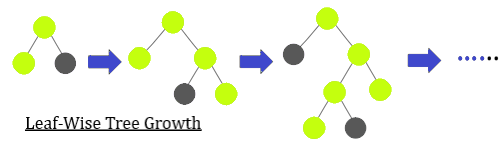

**Why is LightGBM popular?**
 
It has become difficult for the traditional algorithms to give results fast, as the size of the data is increasing rapidly day by day. LightGBM is called “Light” because of its computation power and giving results faster. It takes less memory to run and is able to deal with large amounts of data. Most widely used algorithm in Hackathons because the motive of the algorithm is to get good accuracy of results and also brace GPU leaning.

**When to use LightGBM?**
 
LightGBM is not for a small volume of datasets. It can easily overfit small data due to its sensitivity. It can be used for data having more than 10,000+ rows. There is no fixed threshold that helps in deciding the usage of LightGBM. It can be used for large volumes of data especially when one needs to achieve a high accuracy.

**What are LightGBM Parameters?**

It is very important to get familiar with basic parameters of an algorithm that we are using. LightGBM has more than 100 parameters that are given in the documentation of LightGBM, but there is no need to study all of them. Let us see what are such different parameters. 

- Control Parameters:
 
Max depth: It gives the depth of the tree and also controls the overfitting of the model. If you feel your model is getting overfitted lower down the max depth.

Min_data_in_leaf: Leaf minimum number of records also used for controlling overfitting of the model.

Feature_fraction: It decides the randomly chosen parameter in every iteration for building trees. If it is 0.7 then it means 70% of the parameter would be used.

Bagging_fraction: It checks for the data fraction that will be used in every iteration. Often, used to increase the training speed and avoid overfitting.

Early_stopping_round: If the metric of the validation data does show any improvement in last early_stopping_round rounds. It will lower the imprudent iterations.

Lambda: It states regularization. Its values range from 0 to 1.

Min_gain_to_split: Used to control the number of splits in the tree.
 
- Core Parameters:
 
Task: It tells about the task that is to be performed on the data. It can either train on the data or prediction on the data.

Application: This parameter specifies whether to do regression or classification. LightGBM default parameter for application is regression.

Binary: It is used for binary classification.

Multiclass: It is used for multiclass classification problems.

Regression: It is used for doing regression.

Boosting: It specifies the algorithm type.

rf :  Used for Random Forest.

Goss: Gradient-based One Side Sampling.

Num_boost_round: It tells about the boosting iterations.

Learning_rate: The role of learning rate is to power the magnitude of the changes in the approximate that gets updated from each tree’s output. It has values : 0.1,0.001,0.003.

Num_leaves: It gives the total number of leaves that would be present in a full tree, default value: 31

- Metric Parameter:
It takes care of the loss while building the model. Some of them are stated below for classification as well as regression.

Mae: Mean absolute error.

Mse: Mean squared error.

Binary_logloss: Binary Classification loss.

Multi_logloss: Multi Classification loss.
 
- Parameter Tuning :

Parameter Tuning is an important part that is usually done by data scientists to achieve a good accuracy, fast result and to deal with overfitting. Let us see quickly some of the parameter tuning you can do for better results.

num_leaves: This parameter is responsible for the complexity of the model. Its values should be ideally less than or equal to 2. If its value is more it would result in overfitting of the model.

Min_data_in_leaf: Assigning bigger value to this parameter can result in underfitting of the model. Giving it a value of 100 or 1000 is sufficient for a large dataset.

Max_depth: To limit the depth of the tree max_depth is used.

It has got following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data.

In [12]:
#Reading Dataset from csv file
basepath = '../../Data\\'
df = pd.read_table(basepath+ 'fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [13]:
#Input and Output Variables
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']
y.unique() #Multiclass

array([1, 2, 3, 4], dtype=int64)

In [14]:
#Scaling X and y
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

#Splitting dataset into Train Test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41,) (18,)


In [15]:
#LightGBM Algorithm
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

#Predicting
y_pred = lgbm.predict(X_test)
y_pred

array([4, 1, 1, 4, 4, 4, 4, 3, 4, 4, 4, 1, 3, 4, 1, 3, 1, 3], dtype=int64)

In [16]:
#Accuracy of Prediction
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

conf_df = confusion_matrix(test_calc['fruit_label'],test_calc['predicted'])
print (conf_df)

metric_report = classification_report(test_calc['fruit_label'], test_calc['predicted'])
print(metric_report)  

[[3 0 3 0]
 [1 0 0 0]
 [1 0 0 5]
 [0 0 1 4]]
              precision    recall  f1-score   support

           1       0.60      0.50      0.55         6
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.44      0.80      0.57         5

    accuracy                           0.39        18
   macro avg       0.26      0.33      0.28        18
weighted avg       0.32      0.39      0.34        18



c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>While analyzing the predicted output, we see that the accuracy of the model is at 39.1%.

[<a href="#Content">Back to Content</a>]

## 4. XGBoost

XGBoost or extreme gradient boosting is one of the well-known gradient boosting techniques(ensemble) having enhanced performance and speed in tree-based (sequential decision trees) machine learning algorithms. XGBoost was created by Tianqi Chen and initially maintained by the Distributed (Deep) Machine Learning Community (DMLC) group. It is the most common algorithm used for applied machine learning in competitions and has gained popularity through winning solutions in structured and tabular data. It is open-source software.

It falls under the category of Boosting techniques in Ensemble Learning. Ensemble learning consists of a collection of predictors which are multiple models to provide better prediction accuracy. In Boosting technique the errors made by previous models are tried to be corrected by succeeding models by adding some weights to the models. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.

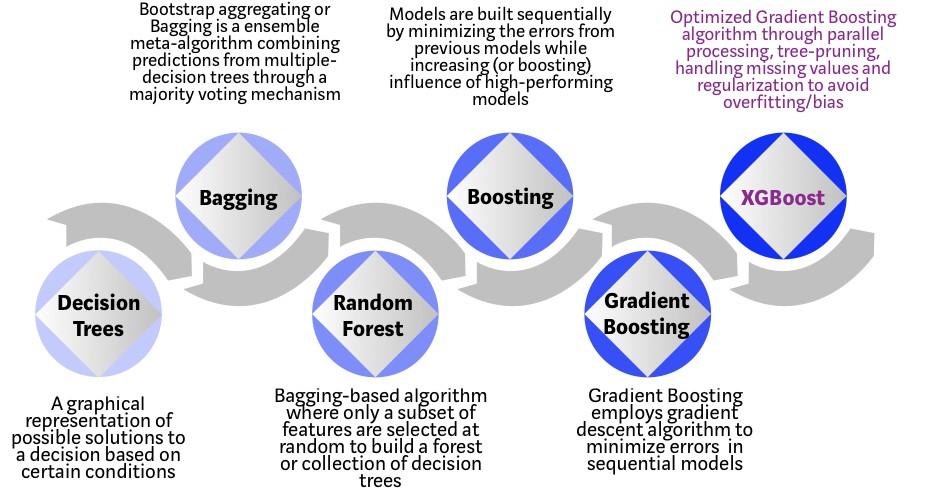

**Goals of XGBoost :**

- Execution Speed: XGBoost was almost always faster than the other benchmarked implementations from R, Python Spark and H2O and it is really faster when compared to the other algorithms.
- Model Performance: XGBoost dominates structured or tabular datasets on classification and regression predictive modelling problems.

**Features of XGBoost:**

- Regularized Learning: Regularization term helps to smooth the final learnt weights to avoid over-fitting. The regularized objective will tend to select a model employing simple and predictive functions.
- Gradient Tree Boosting: The tree ensemble model cannot be optimized using traditional optimization methods in Euclidean space. Instead, the model is trained in an additive manner.
- Shrinkage and Column Subsampling: Besides the regularized objective, two additional techniques are used to further prevent overfitting. The first technique is shrinkage introduced by Friedman. Shrinkage scales newly added weights by a factor η after each step of tree boosting. Similar to a learning rate in stochastic optimization, shrinkage reduces the influence of each tree and leaves space for future trees to improve the model. 
- Can be run on both single and distributed systems(Hadoop, Spark).
- XGBoost is used in supervised learning(regression and classification problems).
- Supports parallel processing.
- Cache optimization.
- Efficient memory management for large datasets exceeding RAM.
- Has a variety of regularizations which helps in reducing overfitting.
- Auto tree pruning – Decision tree will not grow further after certain limits internally.
- Can handle missing values.
- Has inbuilt Cross-Validation.
- Takes care of outliers to some extent.

The algorithm differentiates itself in the following ways:
- A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.
- Portability: Runs smoothly on Windows, Linux, and OS X.
- Languages: Supports all major programming languages including C++, Python, R, Java, Scala, and Julia.
- Cloud Integration: Supports AWS, Azure, and Yarn clusters and works well with Flink, Spark, and other ecosystems.

In [17]:
#Reading Dataset from csv file
basepath = '../../Data\\'
df = pd.read_table(basepath+ 'fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [21]:
df['fruit_label'].unique()

array([1, 2, 3, 4], dtype=int64)

In [18]:
#Input and Output Variables
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']
y.unique() #Multiclass

array([1, 2, 3, 4], dtype=int64)

In [19]:
#Scaling X and y
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

#Splitting dataset into Train Test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41,) (18,)


In [22]:
#added by sharada
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [26]:
y_train

array([3, 2, 2, 3, 3, 2, 0, 0, 3, 2, 2, 1, 3, 1, 2, 0, 0, 3, 2, 0, 2, 0,
       3, 3, 3, 0, 0, 2, 0, 3, 3, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0],
      dtype=int64)

In [23]:
#XGBoost Algorithm
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#Predicting
y_pred = xgb.predict(X_test)
y_pred

array([2, 0, 0, 2, 3, 2, 2, 0, 2, 2, 3, 3, 3, 3, 0, 0, 1, 3], dtype=int64)

In [24]:
#Accuracy of Prediction
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

conf_df = confusion_matrix(test_calc['fruit_label'],test_calc['predicted'])
print (conf_df)

metric_report = classification_report(test_calc['fruit_label'], test_calc['predicted'])
print(metric_report)  

[[0 0 0 0 0]
 [5 0 0 1 0]
 [0 1 0 0 0]
 [0 0 5 1 0]
 [0 0 1 4 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         1
           3       0.17      0.17      0.17         6
           4       0.00      0.00      0.00         5

    accuracy                           0.06        18
   macro avg       0.03      0.03      0.03        18
weighted avg       0.06      0.06      0.06        18



c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\

>While analyzing the predicted output, we see that the accuracy of the model is at 83%.

[<a href="#Content">Back to Content</a>]

## 5. CatBoost

The term CatBoost is an acronym that stands for "Category” and “Boosting.”

"Boosting" in CatBoost refers to the gradient boosting machine learning. Gradient boosting is a machine learning technique for regression and classification problems. Which produces a prediction model in an ensemble of weak prediction models, typically decision trees. 
Gradient boosting is a robust machine learning algorithm that performs well when used to provide solutions to different types of business problems such as Fraud detection, Recommendation system, Forecasting.
Again, it can return an outstanding result with relatively fewer data. Unlike other machine learning algorithms that only perform well after learning from extensive data. Gradient boosting is a powerful machine learning algorithm that is widely applied to multiple types of business challenges like fraud detection, recommendation items, forecasting and it performs well also. It can also return very good result with relatively less data, unlike DL models that need to learn from a massive amount of data.

According to the CatBoost documentation, CatBoost supports numerical, categorical, and text features but has a good handling technique for categorical data. 

The CatBoost algorithm has quite a number of parameters to tune the features in the processing stage.

**Architecture of CatBoost:**
The CatBoost algorithm grows a balanced tree. In the tree structure, the feature-split pair is performed to choose a leaf. 

The split with the smallest penalty is selected for all the level's nodes according to the penalty function. This method is repeated level by level until the leaves match the depth of the tree. 

By default, CatBoost uses symmetric trees ten times faster and gives better quality than non-symmetric trees. 

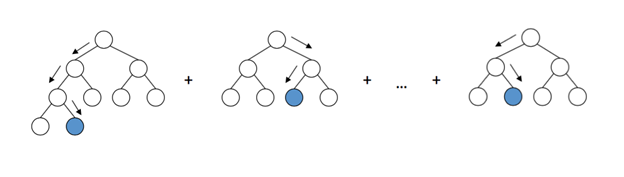

**Where can CatBoost Model be used?**

It is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

**A comparison of the three models (LightGBM, CatBoost, XGBoost) using some characteristics:**

- Split:
The split function is a useful technique, and there are different ways of splitting features for these three machine learning algorithms. One right way of splitting features during the processing phase is to inspect the characteristics of the column.
lightGBM uses the histogram-based split finding and utilizes a gradient-based one-side sampling (GOSS) that reduces complexity through gradients. Small gradients are well trained, which means small training errors, and large gradients are undertrained. In Light GBM, for GOSS to perform well and to reduce complexity, the focus is on instances with large gradients. While a random sampling technique is implemented on instances with small gradients.

The CatBoost algorithm introduced a unique system called Minimal Variance Sampling (MVS), which is a weighted sampling version of the widely used approach to regularization of boosting models, Stochastic Gradient Boosting.Also, Minimal Variance Sampling (MVS) is the new default option for subsampling in CatBoost.With this technique, the number of examples needed for each iteration of boosting decreases, and the quality of the model improves significantly compared to the other gradient boosting models. The features for each boosting tree are sampled in a way that maximizes the accuracy of split scoring.

In contrast to the two algorithms discussed above, XGBoost does not utilize any weighted sampling techniques. This is the reason why the splitting process is slower compared to the GOSS of LightGBM and MVS of CatBoost.

- Leaf Growth:
A significant change in the implementation of the gradient boosting algorithms such as XGBoost, LightGBM, CatBoost, is the method of tree construction, also called leaf growth.The CatBoost algorithm grows a balanced tree. In the tree structure, the feature-split pair is performed to choose a leaf. The split with the smallest penalty is selected for all the level's nodes according to the penalty function. This method is repeated level by level until the leaves match the depth of the tree. By default, CatBoost uses symmetric trees ten times faster and gives better quality than non-symmetric trees.  However, in some cases, other tree growing strategies (Lossguide, Depthwise) can provide better results than growing symmetric trees. The parameters that change the tree growing policy include
- grow-policy,
- min-data-in-leaf, 
- max-leaves.

LightGBM grows the tree leaf-wise (best-first) tree growth. The leaf-wise growth finds the leaves that minimize the loss and split just those leaves without touching the rest (leaves that maximize the loss), allowing an imbalanced tree structure. The leaf-wise growth strategy seems to be an excellent method to achieve a lower loss. This is because it does not grow level-wise, but it often results in overfitting when the data set is small.However, this strategy's greed with LightGBM can be regularized using these parameters
– num_leaves, 
- min_data_in_leaf, 
- max_depth.

XGBoost also uses the leaf-wise strategy, just like the LightGBM algorithm. The leaf-wise approach is a good choice for large datasets, which is one reason why XGBoost performs well. In XGBoost, the parameter that handles the splits process to reduce overfit is 
- max_depth.

- Missing Values Handling:
CatBoost supports three modes for processing missing values, "Forbidden,"Min," and "Max.” For "Forbidden,” CatBoost treats missing values as not supported. The presence of the missing values is interpreted as errors. For "Min,” missing values are processed as the minimum value for a feature.With this method, the split that separates missing values from all other values is considered when selecting splits. "Max" works just the same as "Min,” but the difference is the change from minimum to maximum values. The method of handling missing values for LightGBM and XGBoost is similar. The missing values will be allocated to the side that reduces the loss in each split.

- Categorical Features Handling:
CatBoost uses one-hot encoding for handling categorical features. By default, CatBoost uses one-hot encoding for categorical features with a small number of different values in most modes. The number of categories for one-hot encoding can be controlled by the one_hot_max_size parameter in Python and R. On the other hand, the CatBoost algorithm categorical encoding is known to make the model slower. However, the engineers at Yandex have in the documentation stated that one-hot encoding should not be used during pre-processing because it affects the model’s speed.

**When To Use CatBoost**

- Short training time on a robust data: Unlike some other machine learning algorithms, CatBoost performs well with a small data set. However, it is advisable to be mindful of overfitting. A little tweak to the parameters might be needed here.
- Working on a small data set: This is one of the significant strengths of the CatBoost algorithm. Suppose your data set has categorical features, and converting it to numerical format seems to be quite a lot of work.In that case, you can capitalize on the strength of CatBoost to make the process of building your model easy.
- When you are working on a categorical dataset: CatBoost is incredibly faster than many other machine learning algorithms. The splitting, tree structure, and training process are optimized to be faster on GPU and CPU. Training on GPU is 40 times faster than on CPU, two times faster than LightGBM, and 20 times faster than XGBoost.

**When To Not Use CatBoost**

There are not many disadvantages of using CatBoost for whatever data set. So far, the hassle why many do not consider using CatBoost is because of the slight difficulty in tuning the parameters to optimize the model for categorical features.

**The advantages of the CatBoost algorithm are:**

- Robust: CatBoost can improve the performance of the model while reducing overfitting and the time spent on tuning.CatBoost has several parameters to tune. Still, it reduces the need for extensive hyper-parameter tuning because the default parameters produce a great result.
- Accuracy: The CatBoost algorithm is a high performance and greedy novel gradient boosting implementation. Hence, CatBoost (when implemented well) either leads or ties in competitions with standard benchmarks.
- Categorical Features Support: The key features of CatBoost is one of the significant reasons why it was selected by many boosting algorithms such as LightGBM,  XGBoost algorithm ..etc With other machine learning algorithms, after preprocessing and cleaning your data, the data has to be converted into numerical features so that the machine can understand and make predictions. This is same like, for any text related models we convert the text data into to numerical data it is know as word embedding techniques. This process of encoding or conversion is time-consuming. CatBoost supports working with non-numeric factors, and this saves some time plus improves your training results.
- Easy Implementation:CatBoost offers easy-to-use interfaces. The CatBoost algorithm can be used in Python with scikit-learn, R, and command-line interfaces.
- Fast and scalable GPU version: the researchers and machine learning engineers designed CatBoost at Yandex to work on data sets as large as tens of thousands of objects without lagging. 
- Training your model on GPU gives a better speedup when compared to training the model on CPU. To crown this improvement, the larger the dataset is, the more significant the speedup. CatBoost efficiently supports multi-card configuration. So, for large datasets, use a multi-card configuration.
- Faster Training & Predictions: Before the improvement of servers, the maximum number of GPUs per server is 8 GPUs. Some data sets are more extensive than that, but CatBoost uses distributed GPUs. This feature enables CatBoost to learn faster and make predictions 13-16 times faster than other algorithms.
- Supporting Community of Users:The non-availability of a team to contact when you encounter issues with a product you consume can be very annoying. This is not the case for CatBoost. CatBoost has a growing community where the developers lookout for feedbacks and contributions.There is a Slack community, a Telegram channel (with English and Russian versions), and Stack Overflow support. If you ever discover a bug, there is a page via GitHub for bug reports.

In [27]:
#Reading Dataset from csv file
basepath = '../../Data\\'
df = pd.read_table(basepath+ 'fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [28]:
#Input and Output Variables
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']
y.unique() #Multiclass

array([1, 2, 3, 4], dtype=int64)

In [29]:
#Scaling X and y
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

#Splitting dataset into Train Test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41, 4) (18, 4) (41,) (18,)


In [30]:
#XGBoost Algorithm
catb = CatBoostClassifier()
catb.fit(X_train, y_train)

#Predicting
y_pred = catb.predict(X_test)
y_pred

c:\program files\python39\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.067232
0:	learn: 1.3458124	total: 131ms	remaining: 2m 10s
1:	learn: 1.3088004	total: 131ms	remaining: 1m 5s
2:	learn: 1.2724275	total: 132ms	remaining: 43.8s
3:	learn: 1.2327834	total: 133ms	remaining: 33.1s
4:	learn: 1.2033584	total: 134ms	remaining: 26.7s
5:	learn: 1.1704781	total: 135ms	remaining: 22.4s
6:	learn: 1.1414836	total: 136ms	remaining: 19.3s
7:	learn: 1.0999791	total: 137ms	remaining: 17s
8:	learn: 1.0730333	total: 139ms	remaining: 15.3s
9:	learn: 1.0429245	total: 140ms	remaining: 13.9s
10:	learn: 1.0200820	total: 142ms	remaining: 12.8s
11:	learn: 0.9933370	total: 143ms	remaining: 11.7s
12:	learn: 0.9553405	total: 144ms	remaining: 10.9s
13:	learn: 0.9291229	total: 145ms	remaining: 10.2s
14:	learn: 0.9022994	total: 146ms	remaining: 9.58s
15:	learn: 0.8689003	total: 147ms	remaining: 9.02s
16:	learn: 0.8448113	total: 148ms	remaining: 8.56s
17:	learn: 0.8252071	total: 149ms	remaining: 8.15s
18:	learn: 0.8104197	total: 150ms	remaining: 7.75s
19:	learn: 0

array([[3],
       [1],
       [1],
       [3],
       [4],
       [3],
       [4],
       [1],
       [3],
       [3],
       [4],
       [4],
       [4],
       [4],
       [1],
       [1],
       [2],
       [4]], dtype=int64)

In [31]:
#Accuracy of Prediction
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

conf_df = confusion_matrix(test_calc['fruit_label'],test_calc['predicted'])
print (conf_df)

metric_report = classification_report(test_calc['fruit_label'], test_calc['predicted'])
print(metric_report)  

[[5 0 0 1]
 [0 1 0 0]
 [0 0 5 1]
 [0 0 0 5]]
              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         1
           3       1.00      0.83      0.91         6
           4       0.71      1.00      0.83         5

    accuracy                           0.89        18
   macro avg       0.93      0.92      0.91        18
weighted avg       0.92      0.89      0.89        18



>While analyzing the predicted output, we see that the accuracy of the model is at 89%.

[<a href="#Content">Back to Content</a>]

In [ ]:
#no errors:tested